In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torch.optim as optim

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

100%|██████████| 170M/170M [00:04<00:00, 42.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = trainset.classes

In [ ]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True
)

In [ ]:
images, labels = next(iter(trainloader))
images[0].shape

torch.Size([3, 32, 32])

In [ ]:
labels.shape

torch.Size([4])

## Visualization

In [ ]:
def imshow(img):
    img = np.transpose(img, (1,2,0))
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()

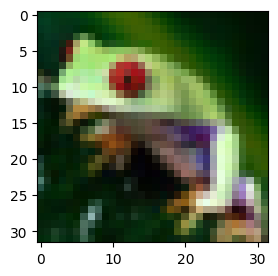

In [ ]:
img = images[0]
imshow(img)

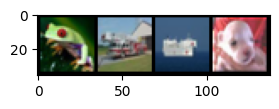

frog
truck
ship
dog


In [ ]:
imshow(torchvision.utils.make_grid(images))
for i in range(4):
    print(classes[labels[i]])

## Single CNN

In [ ]:
import torch.nn as nn

In [ ]:
class SingleCNN(nn.Module):
    def __init__(self):
        super(SingleCNN,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3)


    def forward(self,x):
        return self.conv1(x)

In [ ]:
net = SingleCNN()
out = net(images)
out[0].shape

torch.Size([16, 30, 30])

In [ ]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


## what the kernel has learnt?

In [ ]:
first_out = out[3,15,:,:]

In [ ]:
first_out.shape

torch.Size([30, 30])

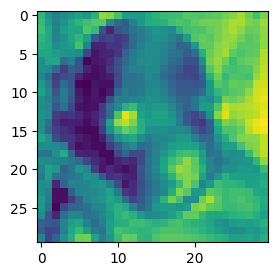

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(first_out.detach())
plt.show()

## Deep CNN

In [ ]:
class DeepCNN(nn.Module):

    def __init__(self):
        super(DeepCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,16,3), # padding = (1,1), stride = 2-> Size-> (N,3,32,32) -> (N,16,30,30)
            nn.AvgPool2d(2,stride=2), # Size -> (N,16,30,30) -> (N,16,15,15)
            nn.Conv2d(16,32,3) # Size -> (N,16,15,15) -> (N,32,13,13)
        )

    def forward(self,x):
        return self.model(x)

In [ ]:
net = DeepCNN()
out = net(images)
out[0].shape

torch.Size([32, 13, 13])

In [ ]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])


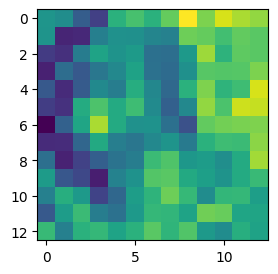

In [ ]:
first_out = out[3,15,:,:]
plt.figure(figsize=(3,3))
plt.imshow(first_out.detach())
plt.show()

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5), # (N, 6, 14, 14) -> (N, 6, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2) # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120), #16x5x5
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0),-1) # flatten
        x = self.fc_model(x)
        return x


In [ ]:
net = LeNet()
out = net(images)
out

tensor([[ 0.0353,  0.0629,  0.0043, -0.0905, -0.0617, -0.0127,  0.1015, -0.1489,
         -0.0278,  0.0279],
        [ 0.0438,  0.0690,  0.0026, -0.0860, -0.0639, -0.0110,  0.0898, -0.1715,
         -0.0258, -0.0014],
        [ 0.0737,  0.0748,  0.0043, -0.0962, -0.0679, -0.0218,  0.1201, -0.1597,
         -0.0340,  0.0288],
        [ 0.0725,  0.0791,  0.0110, -0.0881, -0.0474, -0.0030,  0.0914, -0.1735,
         -0.0607,  0.0120]], grad_fn=<AddmmBackward0>)

In [ ]:
torch.max(out.data,1)

torch.return_types.max(
values=tensor([0.1015, 0.0898, 0.1201, 0.0914]),
indices=tensor([6, 6, 6, 6]))

In [ ]:
batch_size = 4
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())#weight_decay = 0.9)

Epoch: 0/16, Test acc: 39.46, Train acc: 39.56
Epoch: 1/16, Test acc: 44.33, Train acc: 45.22
Epoch: 2/16, Test acc: 44.81, Train acc: 46.25
Epoch: 3/16, Test acc: 46.15, Train acc: 47.91
Epoch: 4/16, Test acc: 48.66, Train acc: 51.25
Epoch: 5/16, Test acc: 48.42, Train acc: 50.83
Epoch: 6/16, Test acc: 49.05, Train acc: 51.55
Epoch: 7/16, Test acc: 50.23, Train acc: 52.36
Epoch: 8/16, Test acc: 49.59, Train acc: 53.54
Epoch: 9/16, Test acc: 50.14, Train acc: 53.98
Epoch: 10/16, Test acc: 50.11, Train acc: 53.89
Epoch: 11/16, Test acc: 49.75, Train acc: 53.95
Epoch: 12/16, Test acc: 51.60, Train acc: 55.97
Epoch: 13/16, Test acc: 50.65, Train acc: 55.11
Epoch: 14/16, Test acc: 51.27, Train acc: 55.45
Epoch: 15/16, Test acc: 51.47, Train acc: 57.00


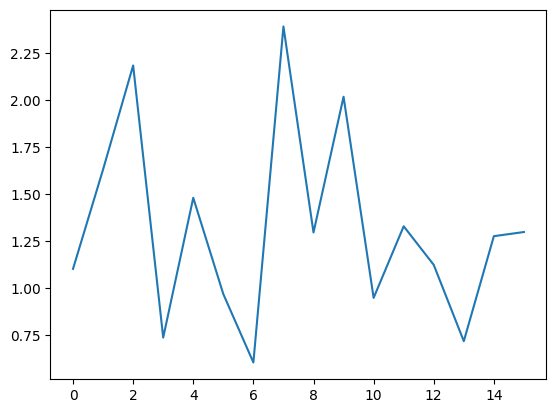

In [ ]:
# Model training
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        opt.zero_grad()


    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f'
    % (epoch,max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)